In [ ]:
%%capture
!pip install mordred
!pip install rdkit-pypi

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools, AllChem

import mordred
from mordred import Calculator, descriptors

import pandas as pd
from tqdm import tqdm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('smilesforall.xlsx')
df

,API_Name,Coformer_Name,Formation,API_SMILES,Coformer_SMILES
0,Norfloxacin,Isonicotinamide,1,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,C1=CN=CC=C1C(=O)N
1,Norfloxacin,Azelaic Acid,1,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,C(CCCC(=O)O)CCCC(=O)O
2,Ciprofloxacin,Thymol,1,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,CC1=CC(=C(C=C1)C(C)C)O
3,Ciprofloxacin,Carvacrol,1,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,CC1=C(C=C(C=C1)C(C)C)O
4,Ciprofloxacin,Nicotinic acid,1,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,C1=CC(=CN=C1)C(=O)O
...,...,...,...,...,...
1028,Trimethoprim,Formic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C(=O)O
1029,Trimethoprim,cinnamic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C1=CC=C(C=C1)C=CC(=O)O
1030,Trimethoprim,trifluoroacetic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C(=O)(C(F)(F)F)O
1031,Trimethoprim,succinic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C(CC(=O)O)C(=O)O


In [ ]:
#mol_list_api = []
mol_list_cof = []

# Process 'API_SMILES'
#for smile_api in df['API_SMILES']:
 #   mol_api = Chem.MolFromSmiles(smile_api)
  #  mol_api = Chem.AddHs(mol_api)
   # AllChem.EmbedMolecule(mol_api)
    #mol_list_api.append(mol_api)

# Process 'Coformer_SMILES'
for smile_cof in df['Coformer_SMILES']:
    mol_cof = Chem.MolFromSmiles(smile_cof)
    mol_cof = Chem.AddHs(mol_cof)
    AllChem.EmbedMolecule(mol_cof)
    mol_list_cof.append(mol_cof)

# Create new columns in the DataFrame
data = pd.concat([
    df,
    #pd.DataFrame(mol_list_api, columns=['Mol_API'])
    pd.DataFrame(mol_list_cof, columns=['Mol_Coformer'])
], axis=1)

# Display the resulting DataFrame
print(data)


           API_Name         Coformer_Name  Formation  \
0       Norfloxacin       Isonicotinamide          1   
1       Norfloxacin          Azelaic Acid          1   
2     Ciprofloxacin                Thymol          1   
3     Ciprofloxacin             Carvacrol          1   
4     Ciprofloxacin        Nicotinic acid          1   
...             ...                   ...        ...   
1028   Trimethoprim           Formic acid          0   
1029   Trimethoprim         cinnamic acid          0   
1030   Trimethoprim  trifluoroacetic acid          0   
1031   Trimethoprim         succinic acid          0   
1032      Valsartan               ethanol          0   

                                             API_SMILES  \
0         CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O   
1         CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O   
2      C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O   
3      C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O   
4      C1CC1N2C=C(C(=O)C3=CC(=C(

In [ ]:
data

,API_Name,Coformer_Name,Formation,API_SMILES,Coformer_SMILES,Mol_Coformer
0,Norfloxacin,Isonicotinamide,1,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,C1=CN=CC=C1C(=O)N,<rdkit.Chem.rdchem.Mol object at 0x7fd3f77b2c70>
1,Norfloxacin,Azelaic Acid,1,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,C(CCCC(=O)O)CCCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f77b2ab0>
2,Ciprofloxacin,Thymol,1,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,CC1=CC(=C(C=C1)C(C)C)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f77b2d50>
3,Ciprofloxacin,Carvacrol,1,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,CC1=C(C=C(C=C1)C(C)C)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f77b2f80>
4,Ciprofloxacin,Nicotinic acid,1,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,C1=CC(=CN=C1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f77b2b20>
...,...,...,...,...,...,...
1028,Trimethoprim,Formic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f7772ff0>
1029,Trimethoprim,cinnamic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C1=CC=C(C=C1)C=CC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f7773060>
1030,Trimethoprim,trifluoroacetic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C(=O)(C(F)(F)F)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f77730d0>
1031,Trimethoprim,succinic acid,0,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,C(CC(=O)O)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7fd3f7773140>


In [ ]:
mol = data['Mol_Coformer'][200]

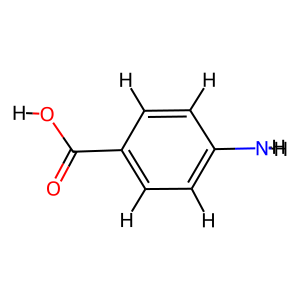

In [ ]:
img = Draw.MolToImage(mol)
img

In [ ]:
calc = Calculator(descriptors, ignore_3D=False)

API_desc = calc.pandas(data["Mol_API"])

100%|██████████| 1033/1033 [04:02<00:00,  4.26it/s]


In [ ]:
API_desc

,ABC_API_API_API,ABCGG_API_API_API,nAcid_API_API_API,nBase_API_API_API,SpAbs_A_API_API_API,SpMax_A_API_API_API,SpDiam_A_API_API_API,SpAD_A_API_API_API,SpMAD_A_API_API_API,LogEE_A_API_API_API,...,SRW10_API_API_API,TSRW10_API_API_API,MW_API_API_API,AMW_API_API_API,WPath_API_API_API,WPol_API_API_API,Zagreb1_API_API_API,Zagreb2_API_API_API,mZagreb1_API_API_API,mZagreb2_API_API_API
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.62917,2.504444,5.008889,29.62917,1.288225,4.068999,...,10.211377,57.741670,319.13322,7.783737,1116,41,122.0,147.0,8.25,5.111111
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.62917,2.504444,5.008889,29.62917,1.288225,4.068999,...,10.211377,57.741670,319.13322,7.783737,1116,41,122.0,147.0,8.25,5.111111
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,1.31626,4.15715,...,10.345124,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111,5.138889
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,1.31626,4.15715,...,10.345124,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111,5.138889
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,1.31626,4.15715,...,10.345124,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111,5.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667
1029,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667
1030,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667
1031,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667


In [ ]:
#df = pd.DataFrame(API_desc)

# Add '_cof' suffix to all columns
API_desc.columns = df.columns - '_API_API'

#API_desc.columns = API_desc.columns.str.replace('_API_API', '')

API_desc


,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,SpMAD_A_API,LogEE_A_API,...,SRW10_API,TSRW10_API,MW_API,AMW_API,WPath_API,WPol_API,Zagreb1_API,Zagreb2_API,mZagreb1_API,mZagreb2_API
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.62917,2.504444,5.008889,29.62917,1.288225,4.068999,...,10.211377,57.741670,319.13322,7.783737,1116,41,122.0,147.0,8.25,5.111111
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.62917,2.504444,5.008889,29.62917,1.288225,4.068999,...,10.211377,57.741670,319.13322,7.783737,1116,41,122.0,147.0,8.25,5.111111
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,1.31626,4.15715,...,10.345124,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111,5.138889
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,1.31626,4.15715,...,10.345124,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111,5.138889
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,1.31626,4.15715,...,10.345124,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111,5.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667
1029,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667
1030,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667
1031,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,9.882519,54.636160,290.13789,7.439433,946,33,104.0,121.0,8.027778,4.916667


In [ ]:
calc = Calculator(descriptors, ignore_3D=False)

Cof_desc = calc.pandas(data["Mol_Coformer"])

100%|██████████| 1033/1033 [02:12<00:00,  7.77it/s]


In [ ]:
#df = pd.DataFrame(API_desc)

# Add '_cof' suffix to all columns
Cof_desc.columns = Cof_desc.columns + '_COF'


#API_desc.columns = API_desc.columns.str.replace('_API_API', '')

Cof_desc


,ABC_COF,ABCGG_COF,nAcid_COF,nBase_COF,SpAbs_A_COF,SpMax_A_COF,SpDiam_A_COF,SpAD_A_COF,SpMAD_A_COF,LogEE_A_COF,...,SRW10_COF,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,11.189957,2.193993,4.387987,11.189957,1.243329,3.089765,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,14.627503,2.0,4.0,14.627503,1.125193,3.386356,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,12.675204,2.302776,4.605551,12.675204,1.152291,3.294669,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,13.152542,2.292456,4.584911,13.152542,1.195686,3.294652,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,11.189957,2.193993,4.387987,11.189957,1.243329,3.089765,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,4.174387,17.310771,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000
1029,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,13.674401,2.166455,4.332909,13.674401,1.243127,3.277938,...,8.594710,39.846691,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333
1030,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.60272,2.175328,4.350655,6.60272,0.943246,2.792781,...,8.466531,34.219913,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000
1031,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,8.472136,2.0,4.0,8.472136,1.059017,2.899228,...,7.738488,33.811160,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667


In [ ]:
API = data[['API_Name', 'API_SMILES']]

In [ ]:
Cof = data[['Coformer_Name', 'Coformer_SMILES']]

In [ ]:
Formation = data[['Formation']]

In [ ]:
df_Cof = pd.concat([Cof, Cof_desc], axis=1)
df_Cof.head()

,Coformer_Name,Coformer_SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Isonicotinamide,C1=CN=CC=C1C(=O)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111
1,Azelaic Acid,C(CCCC(=O)O)CCCC(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,14.627503,2.0,4.0,14.627503,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667
2,Thymol,CC1=CC(=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,12.675204,2.302776,4.605551,12.675204,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222
3,Carvacrol,CC1=C(C=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,13.152542,2.292456,4.584911,13.152542,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222
4,Nicotinic acid,C1=CC(=CN=C1)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111


In [ ]:
#df = pd.DataFrame(API_desc)

# Add '_cof' suffix to all columns
df_Cof.columns = df.columns + '_COF'

#API_desc.columns = API_desc.columns.str.replace('_API_API', '')

df_Cof


,Coformer_Name_COF,Coformer_SMILES_COF,ABC_COF,ABCGG_COF,nAcid_COF,nBase_COF,SpAbs_A_COF,SpMax_A_COF,SpDiam_A_COF,SpAD_A_COF,...,SRW10_COF,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF
0,Isonicotinamide,C1=CN=CC=C1C(=O)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111
1,Azelaic Acid,C(CCCC(=O)O)CCCC(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,14.627503,2.0,4.0,14.627503,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667
2,Thymol,CC1=CC(=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,12.675204,2.302776,4.605551,12.675204,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222
3,Carvacrol,CC1=C(C=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,13.152542,2.292456,4.584911,13.152542,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222
4,Nicotinic acid,C1=CC(=CN=C1)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Formic acid,C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,2.828427,1.414214,2.828427,2.828427,...,4.174387,17.310771,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000
1029,cinnamic acid,C1=CC=C(C=C1)C=CC(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,13.674401,2.166455,4.332909,13.674401,...,8.594710,39.846691,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333
1030,trifluoroacetic acid,C(=O)(C(F)(F)F)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.60272,2.175328,4.350655,6.60272,...,8.466531,34.219913,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000
1031,succinic acid,C(CC(=O)O)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,8.472136,2.0,4.0,8.472136,...,7.738488,33.811160,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667


In [ ]:
df_Cof['Coformer_Name_COF'] = df_Cof['Coformer_Name_COF'].str.replace('_COF', '')
df_Cof['Coformer_SMILES_COF'] = df_Cof['Coformer_SMILES_COF'].str.replace('_COF', '')
df_Cof

,Coformer_Name_COF,Coformer_SMILES_COF,ABC_COF,ABCGG_COF,nAcid_COF,nBase_COF,SpAbs_A_COF,SpMax_A_COF,SpDiam_A_COF,SpAD_A_COF,...,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF,Coformer_Name_Cof,Coformer_SMILES_Cof
0,Isonicotinamide,C1=CN=CC=C1C(=O)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,11.189957,2.193993,4.387987,11.189957,...,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111,Isonicotinamide,C1=CN=CC=C1C(=O)N
1,Azelaic Acid,C(CCCC(=O)O)CCCC(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,14.627503,2.0,4.0,14.627503,...,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667,Azelaic Acid,C(CCCC(=O)O)CCCC(=O)O
2,Thymol,CC1=CC(=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,12.675204,2.302776,4.605551,12.675204,...,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222,Thymol,CC1=CC(=C(C=C1)C(C)C)O
3,Carvacrol,CC1=C(C=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,13.152542,2.292456,4.584911,13.152542,...,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222,Carvacrol,CC1=C(C=C(C=C1)C(C)C)O
4,Nicotinic acid,C1=CC(=CN=C1)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,11.189957,2.193993,4.387987,11.189957,...,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111,Nicotinic acid,C1=CC(=CN=C1)C(=O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Formic acid,C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,2.828427,1.414214,2.828427,2.828427,...,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000,Formic acid,C(=O)O
1029,cinnamic acid,C1=CC=C(C=C1)C=CC(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,13.674401,2.166455,4.332909,13.674401,...,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333,cinnamic acid,C1=CC=C(C=C1)C=CC(=O)O
1030,trifluoroacetic acid,C(=O)(C(F)(F)F)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,6.60272,2.175328,4.350655,6.60272,...,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000,trifluoroacetic acid,C(=O)(C(F)(F)F)O
1031,succinic acid,C(CC(=O)O)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,8.472136,2.0,4.0,8.472136,...,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667,succinic acid,C(CC(=O)O)C(=O)O


In [ ]:
len(df_Cof)

1033

In [ ]:
df_API.to_csv('API_descriptors.csv', index=None)

In [ ]:
df = pd.concat([Cof, Cof_desc], axis=1)
df.head()

,Coformer_Name,Coformer_SMILES,ABC_COF,ABCGG_COF,nAcid_COF,nBase_COF,SpAbs_A_COF,SpMax_A_COF,SpDiam_A_COF,SpAD_A_COF,...,SRW10_COF,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF
0,Isonicotinamide,C1=CN=CC=C1C(=O)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111
1,Azelaic Acid,C(CCCC(=O)O)CCCC(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,14.627503,2.0,4.0,14.627503,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667
2,Thymol,CC1=CC(=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,12.675204,2.302776,4.605551,12.675204,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222
3,Carvacrol,CC1=C(C=C(C=C1)C(C)C)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,13.152542,2.292456,4.584911,13.152542,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222
4,Nicotinic acid,C1=CC(=CN=C1)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,0,11.189957,2.193993,4.387987,11.189957,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111


In [ ]:
dfapi = pd.read_csv('API_descriptors.csv')
dfapi.head()

,API_Name,API_SMILES,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,...,TSRW10_API,MW_API,AMW_API,WPath_API,WPol_API,Zagreb1_API,Zagreb2_API,mZagreb1_API,mZagreb2_API,Formation
0,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,57.741670,319.13322,7.783737,1116,41,122.0,147.0,8.25,5.111111,1
1,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,57.741670,319.13322,7.783737,1116,41,122.0,147.0,8.25,5.111111,1
2,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111111111111,5.138889,1
3,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111111111111,5.138889,1
4,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,77.675956,331.13322,7.884124,1234,43,134.0,164.0,7.611111111111111,5.138889,1


In [ ]:
df_AC = pd.concat([dfapi, df], axis=1)
df_AC

,API_Name,API_SMILES,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,...,SRW10_COF,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF
0,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111
1,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667
2,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222
3,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222
4,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,4.174387,17.310771,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000
1029,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,8.594710,39.846691,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333
1030,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,8.466531,34.219913,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000
1031,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,7.738488,33.811160,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667


In [ ]:
df_AC = df_AC.drop('Formation', axis=1)
df_AC

,API_Name,API_SMILES,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,...,SRW10_COF,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF
0,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111
1,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667
2,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222
3,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222
4,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,4.174387,17.310771,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000
1029,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,8.594710,39.846691,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333
1030,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,8.466531,34.219913,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000
1031,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,7.738488,33.811160,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667


In [ ]:
df_AaC = pd.concat([df_AC, Formation], axis=1)
df_AaC

,API_Name,API_SMILES,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,...,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF,Formation,Formation
0,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111,1,1
1,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667,1,1
2,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222,1,1
3,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222,1,1
4,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000,0,0
1029,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333,0,0
1030,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000,0,0
1031,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667,0,0


In [ ]:
df_AC.to_csv('modred_descriptors.csv', index=None)

NameError: name 'df_AC' is not defined

In [ ]:
df = pd.read_csv('modred_descriptors.csv')

In [ ]:
columns_to_remove = ['Formation']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df

,API_Name,API_SMILES,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,...,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF,Formation.1
0,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.4722222222222223,2.111111,1
1,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,...,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222222222222,3.166667,1
2,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444444444445,2.472222,1
3,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444444444445,2.472222,1
4,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,...,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.4722222222222223,2.111111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,17.310771,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000,0
1029,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,39.846691,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333,0
1030,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,34.219913,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000,0
1031,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,33.811160,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667,0


In [ ]:
df.rename(columns={'Formation.1': 'Formation'}, inplace=True)
df

In [ ]:
df['SpAbs_A_Cof']

In [ ]:
formation = data[['Formation']]

In [ ]:
API_NS = data[['API_Name', 'API_SMILES']]

In [ ]:
Cof_NS = data[['Coformer_Name', 'Coformer_SMILES']]

In [ ]:
df = pd.concat([df_API, Cof_desc, formation], axis=1)
df.head()

,API_Name,API_SMILES,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Formation
0,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.62917,2.504444,5.008889,29.62917,...,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.472222,2.111111,1
1,Norfloxacin,CCN1C=C(C(=O)C2=CC(=C(C=C21)N3CCNCC3)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.62917,2.504444,5.008889,29.62917,...,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222,3.166667,1
2,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,...,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444,2.472222,1
3,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,...,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444,2.472222,1
4,Ciprofloxacin,C1CC1N2C=C(C(=O)C3=CC(=C(C=C32)N4CCNCC4)F)C(=O)O,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.590244,2.541185,5.049355,31.590244,...,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.472222,2.111111,1


In [ ]:
df_API.to_excel('thesis_mordred.xlsx', index=None)

In [ ]:
df = pd.read_excel('thesis_mordred.xlsx')

In [ ]:
for x in df.index:
    if df.loc[x, "SpAbs_A_API"] == 'multiple fragments (SpAbs_A/SpAbs)':
        df.drop(x, inplace=True)

for x in df.index:
    if df.loc[x, "SpAbs_A_COF"] == 'multiple fragments (SpAbs_A/SpAbs)':
        df.drop(x, inplace=True)

df

In [ ]:
# Count the occurrences of each unique value in 'BinaryColumn'
value_counts = df['Formation'].value_counts()

# Find the minimum count between ones and zeros
min_count = min(value_counts)

# Randomly drop rows with ones to balance the dataset
df_balanced = pd.concat([
    df[df['Formation'] == 0],
    df[df['Formation'] == 1].sample(n=min_count, random_state=42)
])

# Shuffle the rows to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced DataFrame
print("Balanced DataFrame:")
df_balanced.head()


In [ ]:
df_balanced

,API_Name,API_SMILES,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,...,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF,Formation
0,Carbamazepine,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,23.668755653219442,2.461790656897538,4.856592091176619,23.668755653219442,...,39.310842,138.031694,8.626981,114,12,46.0,51.0,4.333333333333334,2.305556,1
1,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,52.353339,278.083747,8.426780,722,27,98.0,111.0,7.618056,4.041667,0
2,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,29.232339,2.54792,5.09584,29.232339,...,39.310842,140.027358,9.335157,114,12,46.0,51.0,4.333333,2.305556,1
3,Piroxicam,CN1C(=C(C2=CC=CC=C2S1(=O)=O)O)C(=O)NC3=CC=CC=N3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,29.232339,2.54792,5.09584,29.232339,...,41.025392,154.026609,9.060389,148,14,52.0,58.0,5.194444,2.472222,1
4,Phenytoin,C1=CC=C(C=C1)C2(C(=O)NC(=O)N2)C3=CC=CC=C3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,25.111327,2.549743,5.01664,25.111327,...,33.343946,104.106990,4.957476,46,4,28.0,26.0,4.5625,1.625000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Desipramine,CNCCCN1C2=CC=CC=C2CCC3=CC=CC=C31,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,26.815455,2.447262,4.821858,26.815455,...,48.280750,228.997099,12.052479,408,25,78.0,90.0,8.277778,3.555556,0
582,Haloperidol,C1CN(CCC1(C2=CC=C(C=C2)Cl)O)CCCC(=O)C3=CC=C(C=...,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,1,33.292285,2.414449,4.828897,33.292285,...,39.140584,138.031694,8.626981,120,11,46.0,50.0,4.333333,2.277778,0
583,Trimethoprim,COC1=CC(=CC(=C1OC)OC)CC2=CN=C(N=C2N)N,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,...,39.160939,155.997807,10.399854,117,11,46.0,50.0,4.333333,2.277778,0
584,Glibenclamide,COC1=C(C=C(C=C1)Cl)C(=O)NCCC2=CC=C(C=C2)S(=O)(...,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,41.32223763839338,2.372861828187951,4.745723656375901,41.32223763839338,...,43.017238,179.058243,8.139011,274,14,58.0,62.0,5.083333333333334,3.027778,1


In [ ]:
df_balanced.to_csv('Mordred_calculation.csv', index=None)

In [ ]:
df.to_csv('Caculated_Mordred.csv', index=None)

In [ ]:
df_trunc = df

In [ ]:
formation = df_trunc['Formation']
len(formation)

999

In [ ]:
columns_to_remove = ['API_Name', 'API_SMILES', 'Coformer_Name', 'Coformer_SMILES', 'Formation']

# Remove the specified columns
N_Data = df_trunc.drop(columns=columns_to_remove)
N_Data

,ABC_API,ABCGG_API,nAcid_API,nBase_API,SpAbs_A_API,SpMax_A_API,SpDiam_A_API,SpAD_A_API,SpMAD_A_API,LogEE_A_API,...,SRW10_COF,TSRW10_COF,MW_COF,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb1_COF,mZagreb2_COF
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,1.2882247681696566,4.068998767583444,...,8.590258,37.289972,122.048013,8.136534,88,9,40.0,43.0,3.4722222222222223,2.111111
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,29.6291696679021,2.504444451703037,5.008888903406074,29.6291696679021,1.2882247681696566,4.068998767583444,...,8.173293,41.179508,188.104859,6.486374,344,10,50.0,48.0,5.972222222222222,3.166667
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,1.3162601710934112,4.1571504822763305,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.194444444444445,2.472222
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,1.3162601710934112,4.1571504822763305,...,9.071423,40.991311,150.104465,6.004179,152,14,52.0,58.0,5.194444444444445,2.472222
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,1,1,31.59024410624187,2.541184772287652,5.049354842443889,31.59024410624187,1.3162601710934112,4.1571504822763305,...,8.590258,37.289972,123.032028,8.788002,88,9,40.0,43.0,3.4722222222222223,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,4.174387,17.310771,46.005479,9.201096,4,0,6.0,4.0,2.25,1.000000
1029,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,8.594710,39.846691,148.052429,7.792233,174,10,48.0,50.0,3.972222,2.583333
1030,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,8.466531,34.219913,113.992864,14.249108,42,6,30.0,30.0,5.173611,1.500000
1031,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,26.599236,2.394797,4.789594,26.599236,1.26663,3.950621,...,7.738488,33.811160,118.026609,8.430472,74,5,30.0,28.0,4.722222,1.916667


In [ ]:
column_num = []
column_bool = []
for column in N_Data.columns:
  column_type = N_Data[column].dtype
  if column_type == 'object':
    pass
  elif column_type =='bool':
    column_bool.append(column)
  else:
    column_num.append(column)


In [ ]:
len(column_bool)

4

In [ ]:
column_bool

['Lipinski_API', 'GhoseFilter_API', 'Lipinski_COF', 'GhoseFilter_COF']

In [ ]:
N_Data = N_Data[column_num + column_bool]

In [ ]:
N_Data.shape

(999, 1914)

In [ ]:
def remove_constant_values(N_Data):
    return [e for e in df.columns if df[e].nunique() == 1]

drop_col = remove_constant_values(N_Data)


new_df_columns = [e for e in N_Data.columns if e not in drop_col]
new_df = df[new_df_columns]
new_df

,nAcid_API,nBase_API,nAromAtom_API,nAromBond_API,nAtom_API,nHeavyAtom_API,nSpiro_API,nBridgehead_API,nHetero_API,nH_API,...,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb2_COF,Lipinski_API,GhoseFilter_API,Lipinski_COF,GhoseFilter_COF
0,1,1,10,11,41,23,0,0,7,18,...,8.136534,88,9,40.0,43.0,2.111111,True,True,True,False
1,1,1,10,11,41,23,0,0,7,18,...,6.486374,344,10,50.0,48.0,3.166667,True,True,True,True
2,1,1,10,11,42,24,0,0,7,18,...,6.004179,150,14,52.0,58.0,2.472222,True,True,True,False
3,1,1,10,11,42,24,0,0,7,18,...,6.004179,152,14,52.0,58.0,2.472222,True,True,True,False
4,1,1,10,11,42,24,0,0,7,18,...,8.788002,88,9,40.0,43.0,2.111111,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,12,12,39,21,0,0,7,18,...,9.201096,4,0,6.0,4.0,1.000000,True,True,True,False
1029,0,0,12,12,39,21,0,0,7,18,...,7.792233,174,10,48.0,50.0,2.583333,True,True,True,False
1030,0,0,12,12,39,21,0,0,7,18,...,14.249108,42,6,30.0,30.0,1.500000,True,True,True,False
1031,0,0,12,12,39,21,0,0,7,18,...,8.430472,74,5,30.0,28.0,1.916667,True,True,True,False


In [ ]:
len(drop_col)

850

In [ ]:
new_df['Lipinski_API'] = df["Lipinski_API"].astype(int)
new_df['GhoseFilter_API'] = df["GhoseFilter_API"].astype(int)
new_df['Lipinski_COF'] = df["Lipinski_COF"].astype(int)
new_df['GhoseFilter_COF'] = df["GhoseFilter_COF"].astype(int)

In [ ]:
new_df.head()

,nAcid_API,nBase_API,nAromAtom_API,nAromBond_API,nAtom_API,nHeavyAtom_API,nSpiro_API,nBridgehead_API,nHetero_API,nH_API,...,AMW_COF,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb2_COF,Lipinski_API,GhoseFilter_API,Lipinski_COF,GhoseFilter_COF
0,1,1,10,11,41,23,0,0,7,18,...,8.136534,88,9,40.0,43.0,2.111111,1,1,1,0
1,1,1,10,11,41,23,0,0,7,18,...,6.486374,344,10,50.0,48.0,3.166667,1,1,1,1
2,1,1,10,11,42,24,0,0,7,18,...,6.004179,150,14,52.0,58.0,2.472222,1,1,1,0
3,1,1,10,11,42,24,0,0,7,18,...,6.004179,152,14,52.0,58.0,2.472222,1,1,1,0
4,1,1,10,11,42,24,0,0,7,18,...,8.788002,88,9,40.0,43.0,2.111111,1,1,1,0


In [ ]:
df_final = pd.concat([new_df,formation], axis=1)
df_final.head()


,nAcid_API,nBase_API,nAromAtom_API,nAromBond_API,nAtom_API,nHeavyAtom_API,nSpiro_API,nBridgehead_API,nHetero_API,nH_API,...,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb2_COF,Lipinski_API,GhoseFilter_API,Lipinski_COF,GhoseFilter_COF,Formation
0,1,1,10,11,41,23,0,0,7,18,...,88,9,40.0,43.0,2.111111,1,1,1,0,1
1,1,1,10,11,41,23,0,0,7,18,...,344,10,50.0,48.0,3.166667,1,1,1,1,1
2,1,1,10,11,42,24,0,0,7,18,...,150,14,52.0,58.0,2.472222,1,1,1,0,1
3,1,1,10,11,42,24,0,0,7,18,...,152,14,52.0,58.0,2.472222,1,1,1,0,1
4,1,1,10,11,42,24,0,0,7,18,...,88,9,40.0,43.0,2.111111,1,1,1,0,1


In [ ]:
# Shuffle the rows
shuffleddd_df = df_final.sample(frac=1).reset_index(drop=True)


# Shuffle the rows
shuffledd_df = shuffleddd_df.sample(frac=1).reset_index(drop=True)


# Shuffle the rows
shuffled_df = shuffledd_df.sample(frac=1).reset_index(drop=True)
shuffled_df

,nAcid_API,nBase_API,nAromAtom_API,nAromBond_API,nAtom_API,nHeavyAtom_API,nSpiro_API,nBridgehead_API,nHetero_API,nH_API,...,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb2_COF,Lipinski_API,GhoseFilter_API,Lipinski_COF,GhoseFilter_COF,Formation
0,1,0,10,11,31,17,0,0,3,14,...,247,11,48.0,48.0,2.861111,1,1,1,0,0
1,0,0,9,10,20,14,0,0,8,6,...,1038,38,118.0,141.0,4.805556,1,0,1,1,1
2,0,1,19,21,56,30,0,0,6,26,...,29,4,22.0,21.0,1.444444,1,1,1,0,0
3,0,0,12,12,31,21,0,0,6,10,...,4,0,6.0,4.0,1.000000,1,1,1,0,0
4,0,1,15,16,63,33,0,0,11,30,...,108,6,34.0,32.0,2.166667,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,17,17,37,22,0,0,4,15,...,198,14,58.0,65.0,2.777778,1,1,1,0,1
995,0,0,11,11,27,17,0,0,8,10,...,195,16,56.0,63.0,2.805556,1,1,1,1,1
996,0,0,6,6,44,25,0,0,7,19,...,108,6,34.0,32.0,2.166667,1,1,1,0,1
997,0,0,6,6,43,25,0,0,8,18,...,9,0,12.0,9.0,1.000000,1,1,1,0,0


In [ ]:
 shuffled_df['Formation'].value_counts()

1    706
0    293
Name: Formation, dtype: int64

In [ ]:
# Count the occurrences of each unique value in 'BinaryColumn'
value_counts = shuffled_df['Formation'].value_counts()

# Find the minimum count between ones and zeros
min_count = min(value_counts)

# Randomly drop rows with ones to balance the dataset
df_balanced = pd.concat([
    shuffled_df[shuffled_df['Formation'] == 0],
    shuffled_df[shuffled_df['Formation'] == 1].sample(n=min_count, random_state=42)
])

# Shuffle the rows to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced DataFrame
print("Balanced DataFrame:")
df_balanced.head()


Balanced DataFrame:


,nAcid_API,nBase_API,nAromAtom_API,nAromBond_API,nAtom_API,nHeavyAtom_API,nSpiro_API,nBridgehead_API,nHetero_API,nH_API,...,WPath_COF,WPol_COF,Zagreb1_COF,Zagreb2_COF,mZagreb2_COF,Lipinski_API,GhoseFilter_API,Lipinski_COF,GhoseFilter_COF,Formation
0,0,0,12,12,36,23,0,0,8,13,...,188,16,56.0,63.0,2.750000,1,1,1,0,1
1,0,0,18,18,39,24,0,0,6,15,...,40,5,32.0,35.0,1.611111,1,1,1,0,0
2,0,0,11,11,27,17,0,0,8,10,...,198,14,58.0,65.0,2.777778,1,1,1,0,1
3,0,0,17,17,64,36,0,0,10,28,...,74,5,30.0,28.0,1.916667,0,0,1,0,1
4,1,0,10,11,31,17,0,0,3,14,...,42,5,30.0,31.0,1.666667,1,1,1,0,0


In [ ]:
len(df_balanced)

586

In [ ]:
df_balanced.to_csv('truncated_descriptors.csv', index=None)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df_final = pd.read_csv('thesis_truncated.csv')
df_final.head()

,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,Lipinski,GhoseFilter,Formation
0,2,0,6,6,18,12,0,0,4,6,...,166.026609,9.223700,197,15,56,62,2.722222,1,0,1
1,0,0,18,18,39,24,0,0,6,15,...,358.054276,9.180879,1351,38,128,149,5.083333,1,1,0
2,0,0,9,10,21,13,0,0,6,8,...,180.064725,8.574511,211,22,70,86,2.833333,1,0,1
3,1,0,12,12,33,18,0,0,3,15,...,241.110279,7.306372,602,27,90,104,4.027778,1,1,1
4,1,0,10,11,31,17,0,0,3,14,...,230.094294,7.422397,530,26,86,100,3.833333,1,1,0


In [ ]:
df_final.shape


(586, 823)